In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%config IPCompleter.use_jedi = False

In [2]:
# read data
data = pd.read_csv('../data/raw/data.csv',encoding='latin-1')


### Initial clean up

In [3]:
# drop the duplicates
data = data.drop_duplicates()

# drop instances where hammer_price is NaN
data = data.loc[pd.notnull(data.hammer_price)]

# Change Auction_date to datetime objects
data.loc[:,'auction_date'] = pd.to_datetime(data.auction_date)

# Dropping some of the attributes which are not likely to contribute to the outcome.
data = data.drop(['artist_birth_year','artist_death_year','artist_nationality','edition','year_of_execution'],axis=1)

# Making sure strings are all strings !
data.loc[:,'category'] = data.category.apply(lambda x : str(x).lower().replace('\r','').replace('\n',' '))

data.loc[:,'materials'] = data.materials.apply(lambda x : str(x).lower().replace('\r','').replace('\n',' '))

data.loc[:,'location'] = data.location.apply(lambda x : str(x).lower().replace('\r','').replace('\n',' '))

### Chaning all the prices to USD

In [4]:
GBP_USD = 1.41
EUR_USD = 1.25
data.loc[data.currency=='GBP','hammer_price'] = data.loc[data.currency=='GBP','hammer_price'].apply(lambda x : x*GBP_USD)
data.loc[data.currency=='EUR','hammer_price'] = data.loc[data.currency=='EUR','hammer_price'].apply(lambda x : x*EUR_USD)
# Dropping the Currency type after cleaning
data = data.drop('currency',axis=1)

## Saving the intermediate data for later use

In [5]:
data.to_csv('../data/interim/001-pe-initial-clean.csv',encoding='latin-1',index=False,sep=';')

In [43]:
s.lower().replace('\n',' ')

'saiufsiuhf asuhdiuahsiud '

In [18]:

data = data.assign(year=[x.year for x in data.auction_date])


In [36]:
data = data.assign(month=[x.month for x in data.auction_date],day=[x.day for x in data.auction_date],week=[x.week for x in data.auction_date])


In [47]:
data = data.sort_values('year')

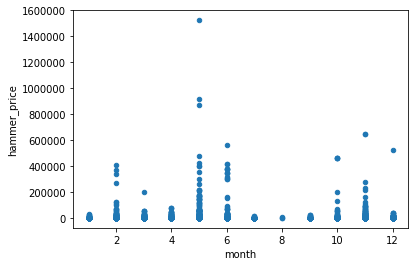

In [56]:
data.loc[data.year==2008].plot('month','hammer_price',kind='scatter')

In [19]:
from unidecode import unidecode
def remove_non_ascii(text):
    return unidecode(str(text))

In [7]:
data.loc[data.artist_name == "Lucio Fontana"].plot('auction_date','hammer_price')

In [21]:
data.loc[data.artist_name == "Lucio Fontana"].plot('year','hammer_price',kind='scatter')

In [60]:
data = data.drop(['artist_nationality','auction_date','edition','estimate_high','estimate_low','title','year_of_execution'],axis=1)

In [89]:
data.loc[:,'artist_name'] = data.artist_name.apply(lambda x : str(x).lower())

In [110]:
data = data.drop(['artist_birth_year','artist_death_year'],axis=1)

In [131]:
def clean_location(x):
    if ',' in x:
        return x.split(',')[-1].strip(' ')
    return x.strip(' ')

In [132]:
data.loc[:,'location'] = data.location.apply(clean_location)